# Обработка данных

Проценты и p_value

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.neural_network import MLPRegressor
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [163]:
import numpy as np

In [164]:
data = pd.read_csv("cinema_successful_orders.csv", encoding = "utf-8", sep=';', comment='#')

In [165]:
len(data) # было изначально

525271

In [166]:
len(data) - len(data.dropna()) # NaN's

5392

In [167]:
data = data.dropna()

## Названия

In [168]:
# def stript(text):
#     return text.strip()

data.movie_name = data.movie_name.apply(lambda x: x.strip())

In [169]:
f = open('gavno.txt', encoding = "utf-8")
stroki = [i.rstrip() for i in f.readlines()]

In [170]:
len(data[data.movie_name.isin(stroki)]) #gavno

1427

In [171]:
data = data[~data.movie_name.isin(stroki)]

In [172]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#      print(data.groupby('movie_name')['movie_rating'].max())

In [173]:
# data[data.movie_name.isna()]

In [174]:
def manual_processing(text):
    if text == "(НЕ)идеальный мужчина":
        return "(Не)идеальный мужчина"
    elif text == "Playmobil Фильм: Через вселенные":
        return "Playmobil фильм: Через вселенные"
    elif text == "Генерал Де Голль":
        return "Генерал де Голль"
    elif text == "Голос луны":
        return "Голос Луны"
    elif text == "Жан Поль Готье, с любовью":
        return "Жан-Поль Готье, с любовью"
    elif text == "Звездные войны: Скайуокер. Восход":
        return "Звёздные Войны: Скайуокер. Восход"
    elif text == "Зеленая книга":
        return "Зелёная книга"
    elif text == "Игры с огнем":
        return "Игры с огнём"
    elif text == "Иди к Папочке":
        return "Иди к папочке"
    elif text == "HUMAN LOST: Исповедь неполноценного человека":
        return "Human Lost: Исповедь неполноценного человека"
    elif text == "Волшебное зеркало, или двойные неприятности":
        return "Волшебное зеркало или двойные неприятности"
    elif text == "Маленькая Мисс Дулиттл":
        return "Маленькая мисс Дулиттл"
    elif text == "Марафон Желаний":
        return "Марафон желаний"
    elif text == "Моя собака Идиот":
        return "Моя собака идиот"
    elif text == "Навсикая из Долины ветров":
        return "Навсикая из долины ветров"
    elif text == "Неизвестная Италия. Матера — город из камня":
        return "Неизвестная Италия. Матера – город из камня"
    elif text == "Никогда редко иногда всегда":
        return "Никогда, редко, иногда, всегда"
    elif text == "Ночь пожирателей рекламы 2020":
        return "Ночь пожирателей рекламы-2020"
    elif text == "Отель Белград":
        return "Отель «Белград»"
    elif text == "Петсон и Финдус 2. Лучшее на свете Рождество":
        return "Петсон и Финдус-2: Лучшее на свете Рождество"
    elif text == "Петсон и Финдус. Финдус переезжает":
        return "Петсон и Финдус: Финдус переезжает"
    elif text == "Пингвиненок Пороро: Пираты Острова сокровищ":
        return "Пингвиненок Пороро: Пираты острова сокровищ"
    elif text == "Поезд в Пусан 2: Полуостров":
        return "Поезд в Пусан-2: Полуостров"
    elif text == "Полицейский с Рублевки. Новогодний Беспредел 2":
        return "Полицейский с Рублевки. Новогодний беспредел 2"
    elif text == "Прыг Скок в поисках сокровищ":
        return "Прыг-скок: В поисках сокровищ"
    elif text == "Сделано в Италии.":
        return "Сделано в Италии"
    elif text == "Сказки Серого волка":
        return "Сказки Серого Волка"
    elif text == "Спайс бойз":
        return "Спайс Бойз"
    elif text == "Спасти Панду":
        return "Спасти панду"
    elif text == "Супер крейзи":
        return "Супер Крейзи"
    elif text == "Тролль: История с хвостом":
        return "Тролль: история с хвостом"
    elif text == "Туннель: Опасно для жизни":
        return "Туннель: опасно для жизни"
    elif text == "Удивительное путешествие Доктора Дулиттла":
        return "Удивительное путешествие доктора Дулиттла"
    elif text == "Унесенные призраками":
        return "Унесённые призраками"
    elif text == "Фрида. Да здравствует жизнь!":
        return "Фрида: Да здравствует жизнь!"
    elif text == "Холодное сердце 2":
        return "Холодное сердце-2"
    elif text == "Чёрное Рождество":
        return "Чёрное рождество"
    elif text == "Щенячий патруль: Скорей спешим на помощь":
        return "Щенячий патруль: Скорей спешим на помощь!"
    elif text == "Яга. Кошмар темного леса":
        return "Яга. Кошмар тёмного леса"
    elif text == "Лето 85-го":
        return "Лето'85"
    elif text == "Пиноккио (2020)":
        return "Пиноккио"
    elif text == "Рюити Сакамото: async в Park Avenue Armory":
        return "Рюити Сакамото: async Live в Park Avenue Armory"
    elif text == "Паразиты (чёрно-белая версия)":
        return "Паразиты"
    elif text == "Поезд в Пусан (расширенная версия)":
        return "Поезд в Пусан"
    else:
        return text
    
data.movie_name = data.movie_name.apply(manual_processing)

In [175]:
# 2-й способ: автоматический, ловит не всё
# def automatic_processing(text):
#     text = text.replace("ё", "е") # можно вообще все гласные убрать
#     text = text.translate(text.maketrans('', '', string.punctuation))
#     text = ''.join(text.split())
#     text = text.lower()
#     return text

In [176]:
data = data.drop(columns = ['movie_id'], axis = 1)

# Либо как с рейтингом, делаем для каждого фильма уникальные id и далее можем удалить колонку с movie_name
# Но movie_name можем удалить только при условии того, что мы убрали все выбросы и говнофильмы,
# а также НОРМАЛЬНО привели ВСЕ фильмы ручным или автоматическим способом к нормальным названиям.
# Т.е. нет ситуаций, когда фильм один и тот же, а названия немного разные
# '''new = data_clear.groupby('movie_name').movie_id.max()
# data_clear = data_clear.drop(columns = ['movie_id'], axis = 1)
# data_clear = data_clear.merge(new, how='outer', on = 'movie_name')
# data_clear = data_clear.drop(columns = ['movie_name'], axis = 1)'''

In [177]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data.groupby(['cinema_city', 'movie_age_restriction']).number_of_tickets.count().sort_values())

In [178]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data.groupby(['movie_name']).movie_rating.max().sort_values())

## movie_rating

In [179]:
data['movie_rating'] = data['movie_rating'].replace(',', '.', regex=True)

In [180]:
data['movie_rating'] = data['movie_rating'].astype(float)

In [181]:
new_data = data.groupby('movie_name').movie_rating.max()
data = data.drop(columns = ['movie_rating'], axis = 1)
data_clear = data.merge(new_data, how='outer', on = 'movie_name')

In [182]:
len(data_clear[data_clear.movie_rating == 0.0])

5880

In [183]:
data_clear = data_clear[data_clear.movie_rating != 0.0]
# dirty_data = data_clear[(data_clear['genre_is_triller'] == '0,0') & (data_clear['genre_is_military'] == '0,0') & (data_clear['genre_is_action'] == '0,0') & (data_clear['genre_is_biographical'] == '0,0') &(data_clear['genre_is_fairy_tale'] == '0,0') &(data_clear['genre_is_science'] == '0,0') &(data_clear['genre_is_fantasy'] == '0,0') &(data_clear['genre_is_historical'] == '0,0') &(data_clear['genre_is_drama'] == '0,0') &(data_clear['genre_is_animation'] == '0,0') &(data_clear['genre_is_cartoon'] == '0,0') &(data_clear['genre_is_documentary'] == '0,0') &(data_clear['genre_is_adventure'] == '0,0') &(data_clear['genre_is_fiction'] == '0,0') &(data_clear['genre_is_childish'] == '0,0') &(data_clear['genre_is_horror'] == '0,0') &(data_clear['genre_is_humor'] == '0,0') &(data_clear['genre_is_western'] == '0,0') &(data_clear['genre_is_noir'] == '0,0') &(data_clear['genre_is_detective'] == '0,0') &(data_clear['genre_is_biography'] == '0,0') &(data_clear['genre_is_criminal'] == '0,0') &(data_clear['genre_is_tragicomedy'] == '0,0') &(data_clear['genre_is_biopic'] == '0,0') &(data_clear['genre_is_mystic'] == '0,0') &(data_clear['genre_is_family'] == '0,0') &(data_clear['genre_is_comedy'] == '0,0') & (data_clear['genre_is_arthouse'] == '0,0')]

## genres

In [184]:
ganry = ['genre_is_triller',
       'genre_is_military', 'genre_is_action', 'genre_is_biographical',
       'genre_is_fairy_tale', 'genre_is_science', 'genre_is_fantasy',
       'genre_is_historical', 'genre_is_drama', 'genre_is_animation',
       'genre_is_cartoon', 'genre_is_documentary', 'genre_is_adventure',
       'genre_is_fiction', 'genre_is_childish', 'genre_is_horror',
       'genre_is_humor', 'genre_is_western', 'genre_is_noir',
       'genre_is_detective', 'genre_is_biography', 'genre_is_criminal',
       'genre_is_tragicomedy', 'genre_is_biopic', 'genre_is_mystic',
       'genre_is_family', 'genre_is_comedy', 'genre_is_arthouse']

In [185]:
genres = data_clear.groupby('movie_name').genre_is_triller.max()
genres = genres.to_frame()
for i in range(1, len(ganry)):
    genres = genres.merge(data_clear.groupby('movie_name')[ganry[i]].max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_military.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_action.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_biographical.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_fairy_tale.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_science.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_fantasy.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_historical.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_drama.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_animation.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_cartoon.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_documentary.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_adventure.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_fiction.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_childish.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_horror.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_humor.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_western.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_noir.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_detective.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_biography.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_criminal.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_tragicomedy.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_biopic.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_mystic.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_family.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_comedy.max(), how='outer', on = 'movie_name')
# genres = genres.merge(data_clear.groupby('movie_name').genre_is_arthouse.max(), how='outer', on = 'movie_name')

In [186]:
# def intovka(n):
#     n = n.replace(",", ".")
#     return float(n)

In [187]:
for i in ganry:
    genres[i] = genres[i].replace(',', '.', regex=True)
    genres[i] = genres[i].astype(float)

In [188]:
# genres.genre_is_action = genres.genre_is_action.apply(intovka)
# genres.genre_is_adventure = genres.genre_is_adventure.apply(intovka)
# genres.genre_is_animation = genres.genre_is_animation.apply(intovka)
# genres.genre_is_arthouse = genres.genre_is_arthouse.apply(intovka)
# genres.genre_is_biographical = genres.genre_is_biographical.apply(intovka)
# genres.genre_is_biography = genres.genre_is_biography.apply(intovka)
# genres.genre_is_biopic = genres.genre_is_biopic.apply(intovka)
# genres.genre_is_cartoon = genres.genre_is_cartoon.apply(intovka)
# genres.genre_is_childish = genres.genre_is_childish.apply(intovka)
# genres.genre_is_comedy = genres.genre_is_comedy.apply(intovka)
# genres.genre_is_criminal = genres.genre_is_criminal.apply(intovka)
# genres.genre_is_detective = genres.genre_is_detective.apply(intovka)
# genres.genre_is_documentary = genres.genre_is_documentary.apply(intovka)
# genres.genre_is_drama = genres.genre_is_drama.apply(intovka)
# genres.genre_is_fairy_tale = genres.genre_is_fairy_tale.apply(intovka)
# genres.genre_is_family = genres.genre_is_family.apply(intovka)
# genres.genre_is_fantasy = genres.genre_is_fantasy.apply(intovka)
# genres.genre_is_fiction = genres.genre_is_fiction.apply(intovka)
# genres.genre_is_historical = genres.genre_is_historical.apply(intovka)
# genres.genre_is_horror = genres.genre_is_horror.apply(intovka)
# genres.genre_is_humor = genres.genre_is_humor.apply(intovka)
# genres.genre_is_military = genres.genre_is_military.apply(intovka)
# genres.genre_is_mystic = genres.genre_is_mystic.apply(intovka)
# genres.genre_is_noir = genres.genre_is_noir.apply(intovka)
# genres.genre_is_science = genres.genre_is_science.apply(intovka)
# genres.genre_is_tragicomedy = genres.genre_is_tragicomedy.apply(intovka)
# genres.genre_is_triller = genres.genre_is_triller.apply(intovka)
# genres.genre_is_western = genres.genre_is_western.apply(intovka)

In [189]:
genres = genres.assign(count_of_genres = genres.genre_is_action + 
                       genres.genre_is_adventure + 
                       genres.genre_is_animation + 
                       genres.genre_is_arthouse + 
                       genres.genre_is_biographical + 
                       genres.genre_is_biography + 
                       genres.genre_is_biopic + 
                       genres.genre_is_cartoon + 
                       genres.genre_is_childish + 
                       genres.genre_is_comedy + 
                       genres.genre_is_criminal + 
                       genres.genre_is_detective + 
                       genres.genre_is_documentary + 
                       genres.genre_is_drama + 
                       genres.genre_is_fairy_tale + 
                       genres.genre_is_family + 
                       genres.genre_is_fantasy + 
                       genres.genre_is_fiction + 
                       genres.genre_is_historical + 
                       genres.genre_is_horror + 
                       genres.genre_is_humor + 
                       genres.genre_is_military + 
                       genres.genre_is_mystic + 
                       genres.genre_is_noir + 
                       genres.genre_is_science + 
                       genres.genre_is_tragicomedy + 
                       genres.genre_is_triller + 
                       genres.genre_is_western)

In [190]:
data_clear = data_clear.drop(columns = ganry, axis = 1)

In [191]:
data_clear = data_clear.merge(genres, how='outer', on = 'movie_name')

In [192]:
# фильмы без жанров
len(data_clear[((data_clear['genre_is_triller'] == 0.0) & (data_clear['genre_is_military'] == 0.0) & (data_clear['genre_is_action'] == 0.0) & (data_clear['genre_is_biographical'] == 0.0) &(data_clear['genre_is_fairy_tale'] == 0.0) &(data_clear['genre_is_science'] == 0.0) &(data_clear['genre_is_fantasy'] == 0.0) &(data_clear['genre_is_historical'] == 0.0) &(data_clear['genre_is_drama'] == 0.0) &(data_clear['genre_is_animation'] == 0.0) &(data_clear['genre_is_cartoon'] == 0.0) &(data_clear['genre_is_documentary'] == 0.0) &(data_clear['genre_is_adventure'] == 0.0) &(data_clear['genre_is_fiction'] == 0.0) &(data_clear['genre_is_childish'] == 0.0) &(data_clear['genre_is_horror'] == 0.0) &(data_clear['genre_is_humor'] == 0.0) &(data_clear['genre_is_western'] == 0.0) &(data_clear['genre_is_noir'] == 0.0) &(data_clear['genre_is_detective'] == 0.0) &(data_clear['genre_is_biography'] == 0.0) &(data_clear['genre_is_criminal'] == 0.0) &(data_clear['genre_is_tragicomedy'] == 0.0) &(data_clear['genre_is_biopic'] == 0.0) &(data_clear['genre_is_mystic'] == 0.0) &(data_clear['genre_is_family'] == 0.0) &(data_clear['genre_is_comedy'] == 0.0) & (data_clear['genre_is_arthouse'] == 0.0))])

415

In [193]:
data_clear = data_clear[~((data_clear['genre_is_triller'] == 0.0) & (data_clear['genre_is_military'] == 0.0) & (data_clear['genre_is_action'] == 0.0) & (data_clear['genre_is_biographical'] == 0.0) &(data_clear['genre_is_fairy_tale'] == 0.0) &(data_clear['genre_is_science'] == 0.0) &(data_clear['genre_is_fantasy'] == 0.0) &(data_clear['genre_is_historical'] == 0.0) &(data_clear['genre_is_drama'] == 0.0) &(data_clear['genre_is_animation'] == 0.0) &(data_clear['genre_is_cartoon'] == 0.0) &(data_clear['genre_is_documentary'] == 0.0) &(data_clear['genre_is_adventure'] == 0.0) &(data_clear['genre_is_fiction'] == 0.0) &(data_clear['genre_is_childish'] == 0.0) &(data_clear['genre_is_horror'] == 0.0) &(data_clear['genre_is_humor'] == 0.0) &(data_clear['genre_is_western'] == 0.0) &(data_clear['genre_is_noir'] == 0.0) &(data_clear['genre_is_detective'] == 0.0) &(data_clear['genre_is_biography'] == 0.0) &(data_clear['genre_is_criminal'] == 0.0) &(data_clear['genre_is_tragicomedy'] == 0.0) &(data_clear['genre_is_biopic'] == 0.0) &(data_clear['genre_is_mystic'] == 0.0) &(data_clear['genre_is_family'] == 0.0) &(data_clear['genre_is_comedy'] == 0.0) & (data_clear['genre_is_arthouse'] == 0.0))]

In [194]:
# Сокращение кода с помощью списков
# ganry - список жанров

# for genre in ganry:
#     genres = genres.merge(data_clear.groupby('movie_name').genre.max(), how='outer', on = 'movie_name')
#     genres.genre = genres.genre.apply(intovka)
#     genres = genres.assign(F += genres.genre)

In [195]:
for i in ganry:
    print(f'{i}: {data_clear[i].nunique()}')

genre_is_triller: 2
genre_is_military: 2
genre_is_action: 2
genre_is_biographical: 2
genre_is_fairy_tale: 1
genre_is_science: 1
genre_is_fantasy: 2
genre_is_historical: 2
genre_is_drama: 2
genre_is_animation: 1
genre_is_cartoon: 2
genre_is_documentary: 2
genre_is_adventure: 2
genre_is_fiction: 2
genre_is_childish: 2
genre_is_horror: 2
genre_is_humor: 1
genre_is_western: 2
genre_is_noir: 2
genre_is_detective: 2
genre_is_biography: 2
genre_is_criminal: 2
genre_is_tragicomedy: 2
genre_is_biopic: 2
genre_is_mystic: 2
genre_is_family: 2
genre_is_comedy: 2
genre_is_arthouse: 2


In [196]:
data_clear = data_clear.drop(columns=['genre_is_fairy_tale', 'genre_is_animation', 'genre_is_humor', 'genre_is_science'], axis = 1)
# нулевые жанры

## dates

In [197]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data_clear.value_counts('session_date'))

In [198]:
# l = [int(i) for i in '2020-10-07'.split("-")]
# date = dt.datetime(l[0], l[1], l[2])
# date.isoweekday()

In [199]:
def date(d):
    l = [int(i) for i in d.split("-")]
    date = dt.datetime(l[0], l[1], l[2])
    if date.isoweekday() <= 5:
        return 0 # будний
    else:
        return 1 # выходной

In [200]:
data_clear.session_date = data_clear.session_date.apply(date)

In [201]:
def weekday(row):
    if row['session_date'] == 0:
        return 1
    else:
        return 0
def weekend(row):
    if row['session_date'] == 1:
        return 1
    else:
        return 0

data_clear['session_date_is_weekday'] = data_clear.apply(weekday,axis = 1)
data_clear['session_date_is_weekend'] = data_clear.apply(weekend,axis = 1)

In [202]:
# d = data_clear.groupby('movie_name')['movie_id'].max()
# d = d.to_frame()
# d = d[d.movie_id == 36284]
# data_clear[data_clear.movie_id == 36284]

In [203]:
# data_clear.creation_date = data_clear.creation_date.apply(date)

## movie_duration

In [204]:
data_clear['movie_duration'] = data_clear['movie_duration'].replace('мин.', ' ', regex=True)

In [205]:
data_clear['movie_duration'] = data_clear['movie_duration'].replace('т', ' ', regex=True)

In [206]:
data_clear['movie_duration'] = data_clear['movie_duration'].astype(int)

## ticket_price

In [207]:
data_clear['ticket_price_in_cu'] = data_clear['ticket_price_in_cu'].replace(',', '.', regex=True)

In [208]:
data_clear['ticket_price_in_cu'] = data_clear['ticket_price_in_cu'].astype(float)

<AxesSubplot: xlabel='ticket_price_in_cu'>

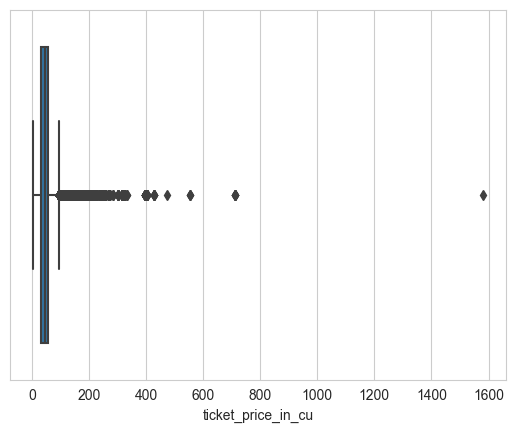

In [209]:
sns.boxplot(x=data_clear['ticket_price_in_cu']) # до очистки

## sales

In [210]:
data_clear['sales_in_cu'] = data_clear['sales_in_cu'].replace(',', '.', regex=True)

In [211]:
data_clear['sales_in_cu'] = data_clear['sales_in_cu'].astype(float)

## movie_age_restriction

In [212]:
data_clear.movie_age_restriction = data_clear.movie_age_restriction.apply(lambda x: x.replace("+", ""))

In [213]:
data_clear.movie_age_restriction = data_clear.movie_age_restriction.astype(int)

In [214]:
def vozrast0(row):
    if row['movie_age_restriction'] == 0:
        return 1
    else:
        return 0
def vozrast6(row):
    if row['movie_age_restriction'] == 6:
        return 1
    else:
        return 0
def vozrast12(row):
    if row['movie_age_restriction'] == 12:
        return 1
    else:
        return 0
def vozrast16(row):
    if row['movie_age_restriction'] == 16:
        return 1
    else:
        return 0
def vozrast18(row):
    if row['movie_age_restriction'] == 18:
        return 1
    else:
        return 0

data_clear['movie_age_restriction_is_0'] = data_clear.apply(vozrast0,axis = 1)
data_clear['movie_age_restriction_is_6'] = data_clear.apply(vozrast6,axis = 1)
data_clear['movie_age_restriction_is_12'] = data_clear.apply(vozrast12,axis = 1)
data_clear['movie_age_restriction_is_16'] = data_clear.apply(vozrast16,axis = 1)
data_clear['movie_age_restriction_is_18'] = data_clear.apply(vozrast18,axis = 1)

In [215]:
# def raiting(n):
#     n = n.replace("+", " ")
#     return int(n)

## Выбросы в тикет прайсе

In [216]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)

In [217]:
q1 = data_clear['ticket_price_in_cu'].quantile(0.25)
q3 = data_clear['ticket_price_in_cu'].quantile(0.75)
iqr = q3 - q1

In [218]:
len(data_clear) - len(data_clear[(data_clear.ticket_price_in_cu <= q3 + iqr) & (data_clear.ticket_price_in_cu >= q1 - iqr)])
# выбросы по цене

28131

In [219]:
data_clear = data_clear[(data_clear.ticket_price_in_cu <= q3 + iqr) & (data_clear.ticket_price_in_cu >= q1 - iqr)]

In [220]:
data_clear[['number_of_tickets', 'ticket_price_in_cu']].corr()

,number_of_tickets,ticket_price_in_cu
number_of_tickets,1.000000,0.024746
ticket_price_in_cu,0.024746,1.000000


<AxesSubplot: xlabel='ticket_price_in_cu'>

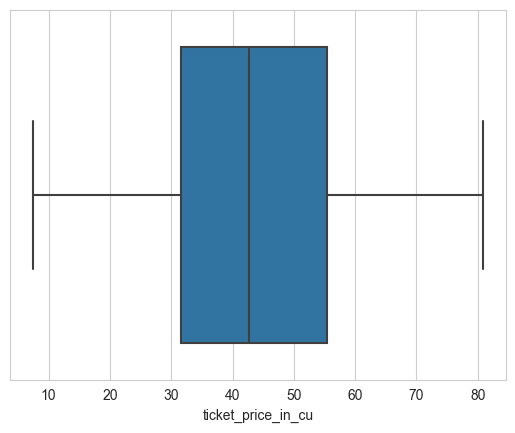

In [221]:
sns.boxplot(x=data_clear['ticket_price_in_cu'])

## Выбросы фильмов по их количеству

In [61]:
iq = data_clear.groupby("movie_name")['order_id'].count().quantile(0.75) - data_clear.groupby("movie_name")['order_id'].count().quantile(0.25)

In [62]:
print(data_clear.groupby("movie_name")['order_id'].count().quantile(0.25) - iq)
print(data_clear.groupby("movie_name")['order_id'].count().quantile(0.75) + iq)

-85.5
177.0


In [63]:
iq = data_clear.groupby("movie_name")['order_id'].count()

In [64]:
iq = iq.to_frame()

In [65]:
iq.order_id.sum()

484026

array([[<AxesSubplot: title={'center': 'order_id'}>]], dtype=object)

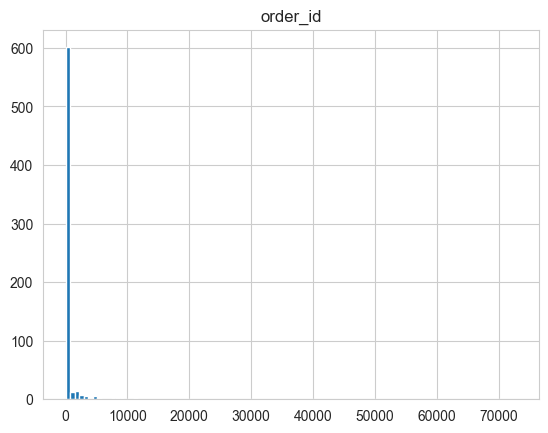

In [66]:
iq.hist(bins = 100)

In [67]:
iq[iq.order_id > 113].order_id.sum()

475379

## Тут убираем ненужные столбики и есть постояшка ли клиент

In [68]:
# frame = data_clear.groupby('client_id')['order_id'].count().to_frame()
# frame.rename(columns = {'order_id':'count_of_repeats_by_people'}, inplace = True)
# data_clear = data_clear.merge(frame, how='outer', on = 'client_id')

In [69]:
# def f(c):
#     if c > 1:
#         return 1
#     elif c == 1:
#         return 0
# frame.count_of_repeats_by_people = frame.count_of_repeats_by_people.apply(f)

In [70]:
# frame.rename(columns = {'count_of_repeats_by_people':'repeater?'}, inplace = True)

In [71]:
# data_clear = data_clear.merge(frame, how='outer', on = 'client_id')

In [222]:
data_clear = data_clear.drop(columns = ['order_id', 'creation_date', 'session_date', 'movie_name', 'movie_age_restriction',
       'places', 'cinema_name',
       'cinema_address', 'cinema_latitude', 'cinema_longitude',
       'client_id', 'movie_rating'], axis = 1)

In [223]:
data_clear.columns

Index(['movie_duration', 'number_of_tickets', 'sales_in_cu',
       'ticket_price_in_cu', 'cinema_city', 'genre_is_triller',
       'genre_is_military', 'genre_is_action', 'genre_is_biographical',
       'genre_is_fantasy', 'genre_is_historical', 'genre_is_drama',
       'genre_is_cartoon', 'genre_is_documentary', 'genre_is_adventure',
       'genre_is_fiction', 'genre_is_childish', 'genre_is_horror',
       'genre_is_western', 'genre_is_noir', 'genre_is_detective',
       'genre_is_biography', 'genre_is_criminal', 'genre_is_tragicomedy',
       'genre_is_biopic', 'genre_is_mystic', 'genre_is_family',
       'genre_is_comedy', 'genre_is_arthouse', 'count_of_genres',
       'session_date_is_weekday', 'session_date_is_weekend',
       'movie_age_restriction_is_0', 'movie_age_restriction_is_6',
       'movie_age_restriction_is_12', 'movie_age_restriction_is_16',
       'movie_age_restriction_is_18'],
      dtype='object')

# АНАЛиз

## Корреляция

In [181]:
# pd.reset_option("display.max_rows")
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_colwidth')
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [228]:
data_hui = data_clear.drop(columns = ['genre_is_triller', 'genre_is_military',
       'genre_is_action', 'genre_is_biographical', 'genre_is_fantasy',
       'genre_is_historical', 'genre_is_drama', 'genre_is_cartoon',
       'genre_is_documentary', 'genre_is_adventure', 'genre_is_fiction',
       'genre_is_childish', 'genre_is_horror', 'genre_is_western',
       'genre_is_noir', 'genre_is_detective', 'genre_is_biography',
       'genre_is_criminal', 'genre_is_tragicomedy', 'genre_is_biopic',
       'genre_is_mystic', 'genre_is_family', 'genre_is_comedy',
       'genre_is_arthouse'], axis = 1)

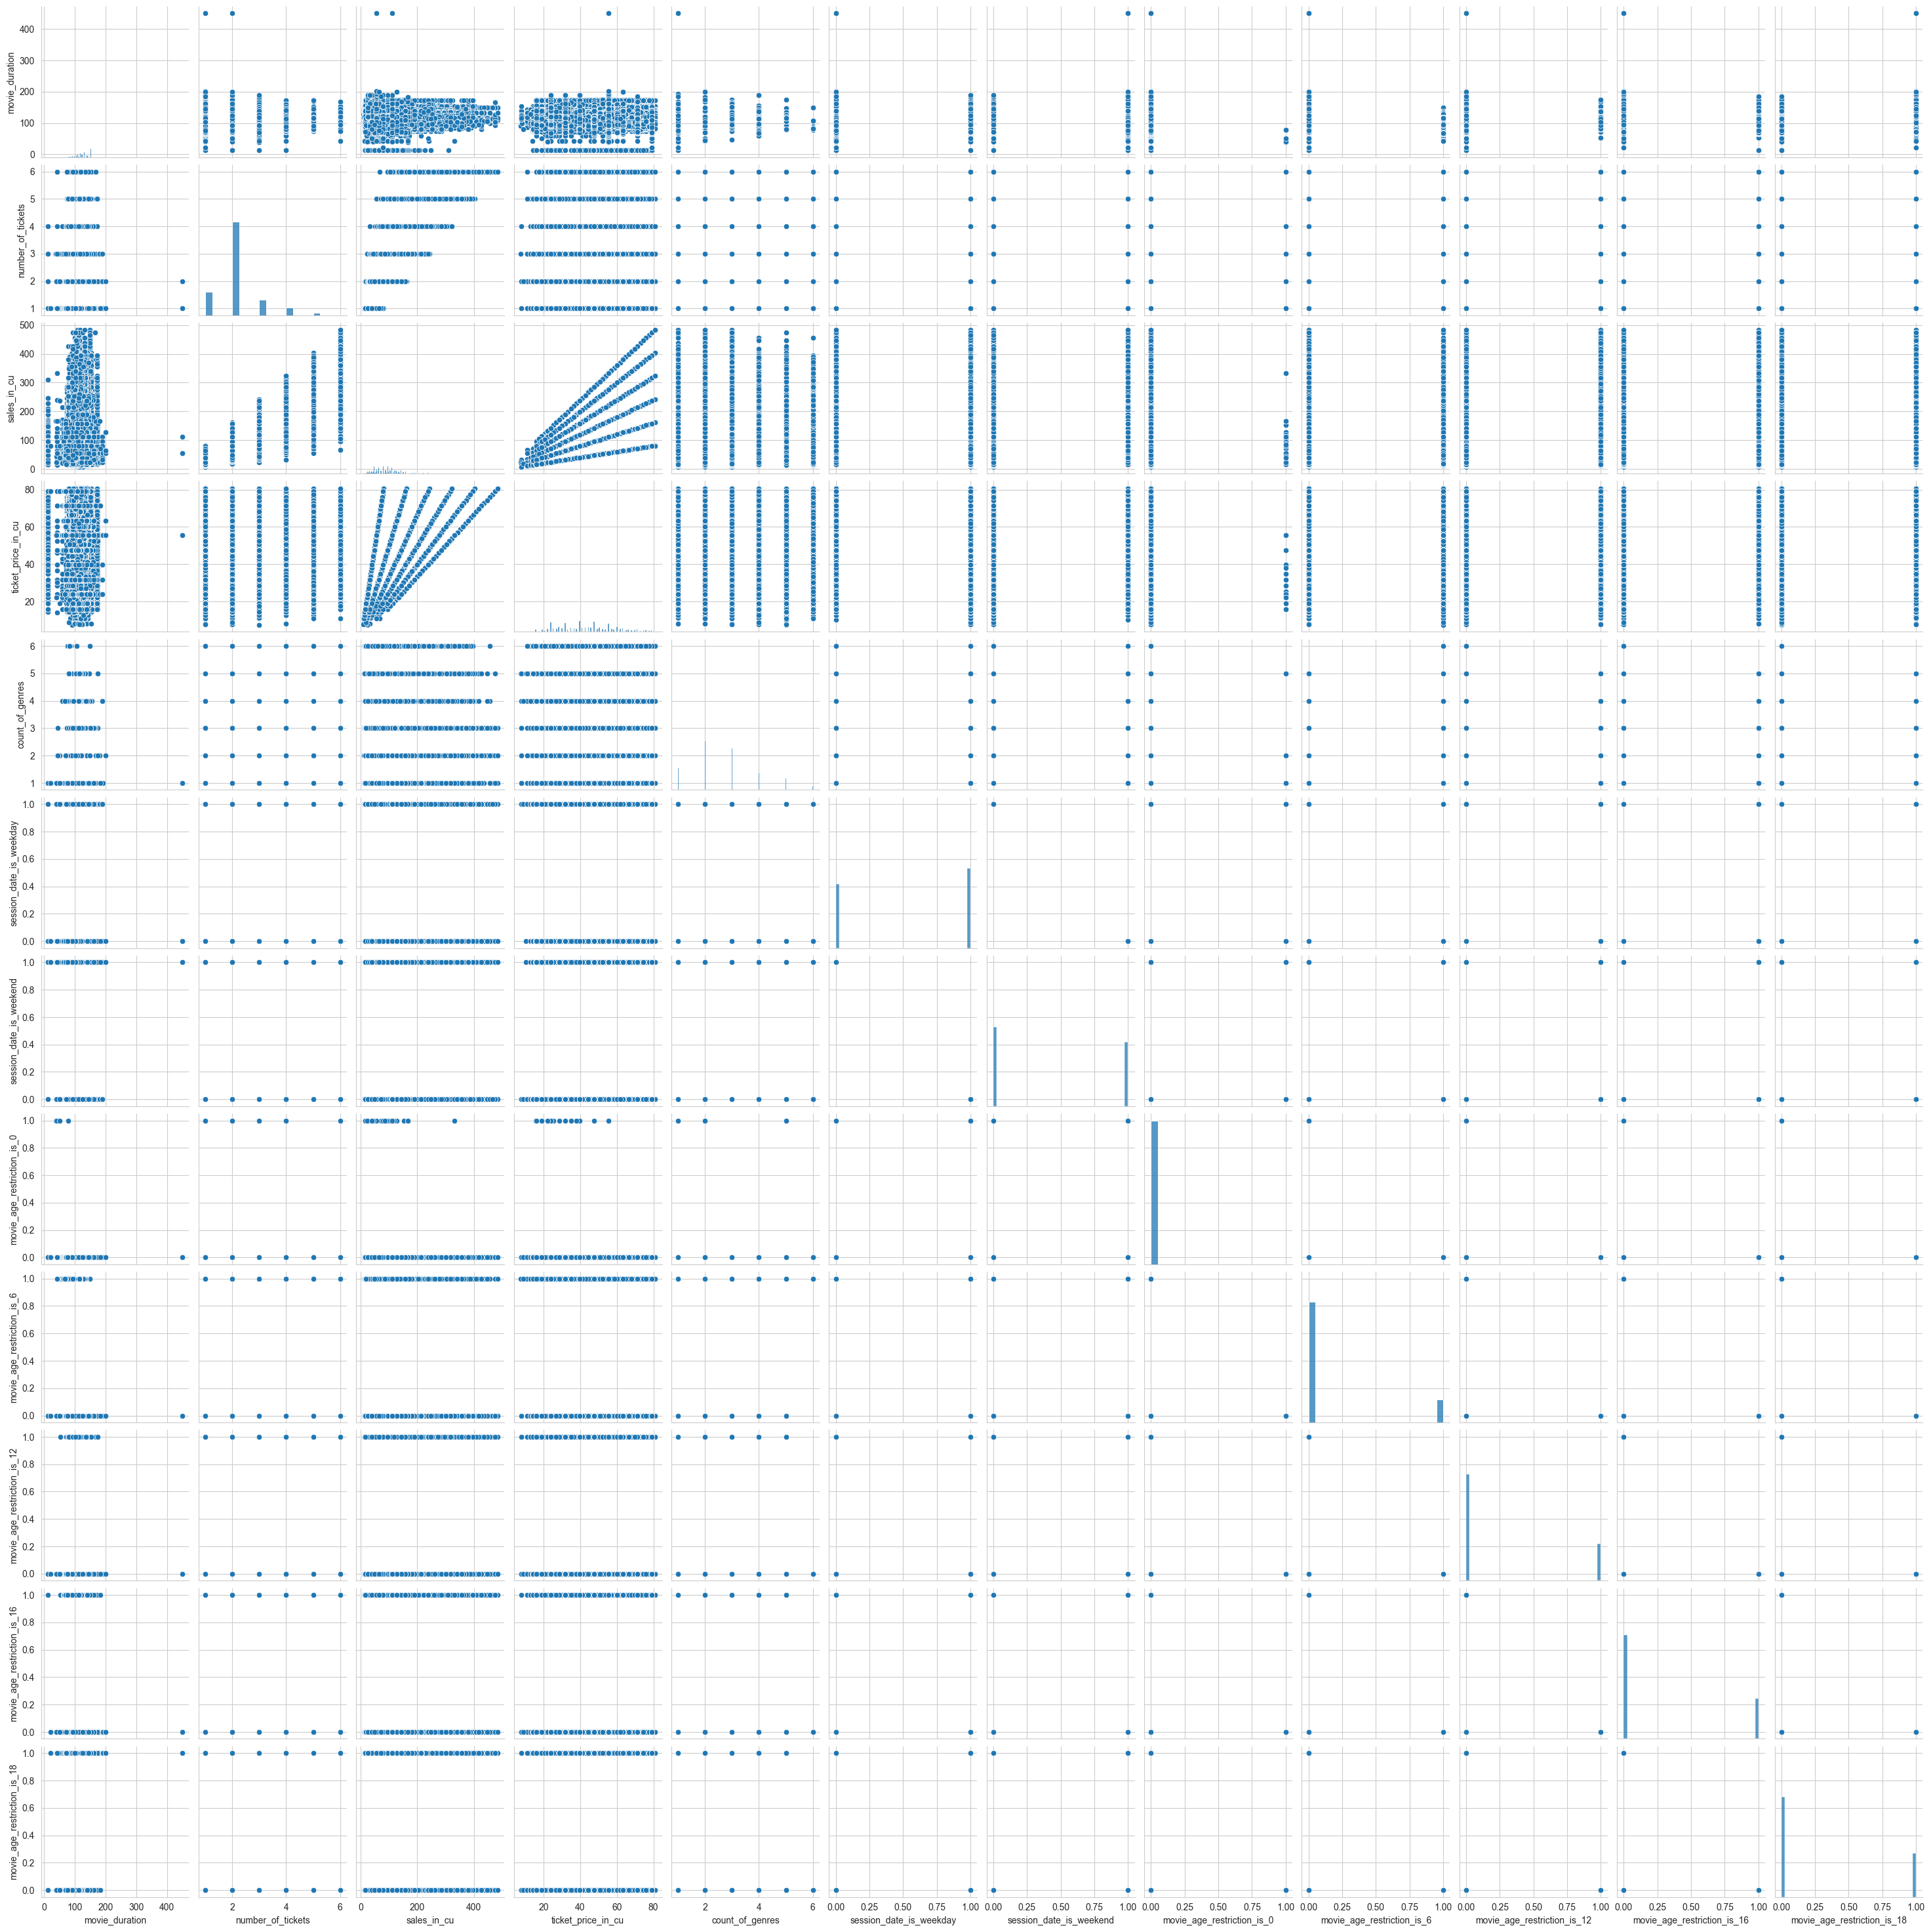

In [229]:
sns.pairplot(data_hui)

In [53]:
corr_table = data_clear.corr()

In [54]:
def force_of_svyaz(x):
    if abs(x) >= 0 and abs(x) < 0.1:
        return 'слабущая'
    elif abs(x) >= 0.1 and abs(x) < 0.3:
        return 'слабенькая'
    elif abs(x) >= 0.3 and abs(x) < 0.5:
        return 'слабая'
    elif abs(x) >= 0.5 and abs(x) < 0.7:
        return 'средняя'
    elif abs(x) >= 0.7 and abs(x) < 0.9:
        return 'высокая'
    elif abs(x) >= 0.9 and abs(x) < 1:
        return 'очень высокая'
    elif abs(x) == 1:
        return 'прямая зависимость'

In [55]:
for i in corr_table.columns:
    corr_table[i] = corr_table[i].apply(force_of_svyaz)

In [56]:
html = corr_table.to_html()
text_file = open("index.html", "w")
text_file.write(html)
text_file.close()

## Пробуем линейную регрессию

In [247]:
enroll = data_clear[data_clear.cinema_city == "Москва"]

In [248]:
enroll = enroll.drop(columns = ['cinema_city'], axis = 1)

In [249]:
enroll.columns

Index(['movie_duration', 'number_of_tickets', 'sales_in_cu',
       'ticket_price_in_cu', 'genre_is_triller', 'genre_is_military',
       'genre_is_action', 'genre_is_biographical', 'genre_is_fantasy',
       'genre_is_historical', 'genre_is_drama', 'genre_is_cartoon',
       'genre_is_documentary', 'genre_is_adventure', 'genre_is_fiction',
       'genre_is_childish', 'genre_is_horror', 'genre_is_western',
       'genre_is_noir', 'genre_is_detective', 'genre_is_biography',
       'genre_is_criminal', 'genre_is_tragicomedy', 'genre_is_biopic',
       'genre_is_mystic', 'genre_is_family', 'genre_is_comedy',
       'genre_is_arthouse', 'count_of_genres', 'session_date_is_weekday',
       'session_date_is_weekend', 'movie_age_restriction_is_0',
       'movie_age_restriction_is_6', 'movie_age_restriction_is_12',
       'movie_age_restriction_is_16', 'movie_age_restriction_is_18'],
      dtype='object')

In [250]:
# 'ticket_price_in_cu'
enrollment_data = enroll[['ticket_price_in_cu', 'movie_duration', 'session_date_is_weekday',
       'session_date_is_weekend', 'movie_age_restriction_is_0', 'movie_age_restriction_is_6',
       'movie_age_restriction_is_12', 'movie_age_restriction_is_16',
       'movie_age_restriction_is_18']].values

In [251]:
enrollment_target = enroll[['number_of_tickets']].values

In [252]:
X, y = enrollment_data, enrollment_target

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [254]:
LinReg = LinearRegression()

In [255]:
LinReg.fit(X_train, y_train)

LinearRegression()

In [256]:
y_pred = LinReg.predict(X_test)

In [257]:
dva = pd.DataFrame(y_test)

In [258]:
odin = pd.DataFrame(y_pred)

          1
2  2.038808


In [275]:
odin

,1
0,2.152924
1,2.313567
2,2.038808
3,1.934504
4,2.192628
...,...
48865,2.034604
48866,2.219845
48867,2.086751
48868,2.080925


In [235]:
dva

,0
0,1.0
1,2.0
2,3.0
3,2.0
4,2.0
...,...
48865,2.0
48866,2.0
48867,2.0
48868,2.0


In [242]:
# from sklearn import tree
# clf = tree.DecisionTreeRegressor()
# clf = clf.fit(X_train, y_train)
# pd.DataFrame(clf.predict(X_test))

,0
0,1.000000
1,2.043796
2,1.692308
3,2.142857
4,1.583333
...,...
48865,2.238095
48866,1.666667
48867,2.166667
48868,2.230769


In [157]:
print(LinReg.score(X, y))

0.024727778297920056


In [158]:
# 'ticket_price_in_cu', 'movie_duration', 'genre_is_triller', 'genre_is_military', 'genre_is_action',
#        'genre_is_biographical', 'genre_is_science', 'genre_is_fantasy',
#        'genre_is_historical', 'genre_is_drama', 'genre_is_cartoon',
#        'genre_is_documentary', 'genre_is_adventure', 'genre_is_fiction',
#        'genre_is_childish', 'genre_is_horror', 'genre_is_western',
#        'genre_is_noir', 'genre_is_detective', 'genre_is_biography',
#        'genre_is_criminal', 'genre_is_tragicomedy', 'genre_is_biopic',
#        'genre_is_mystic', 'genre_is_family', 'genre_is_comedy',
#        'genre_is_arthouse', 'count_of_genres', 'session_date_is_weekday',
#        'session_date_is_weekend', 'movie_age_restriction_is_0',
#        'movie_age_restriction_is_6', 'movie_age_restriction_is_12',
#        'movie_age_restriction_is_16', 'movie_age_restriction_is_18'

In [159]:
LinReg.coef_

array([[4.25454902e-03, 7.76789521e-05, 3.66459804e+10, 3.66459804e+10,
        4.91911546e+06, 4.91911526e+06, 4.91911514e+06, 4.91911500e+06,
        4.91911502e+06]])

In [160]:
LinReg.intercept_

array([-3.66508996e+10])

In [246]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4626798652787869
Mean Squared Error: 0.575637393421447
Root Mean Squared Error: 0.7587077127731384


[Text(0.5651250717364945, 0.9833333333333333, 'x[0] <= 48.542\ngini = 0.515\nsamples = 114029\nvalue = [21122, 75670, 10698, 4843, 1416, 280]'),
 Text(0.28105710336834006, 0.95, 'x[5] <= 0.5\ngini = 0.541\nsamples = 46769\nvalue = [11021, 29359, 4068, 1737, 495, 89]'),
 Text(0.1459781132512568, 0.9166666666666666, 'x[0] <= 28.402\ngini = 0.529\nsamples = 39850\nvalue = [9839, 25297, 2962, 1312, 374, 66]'),
 Text(0.03103273533441655, 0.8833333333333333, 'x[0] <= 17.587\ngini = 0.553\nsamples = 6678\nvalue = [2172, 3874, 418, 165, 39, 10]'),
 Text(0.012014076522041168, 0.85, 'x[3] <= 0.5\ngini = 0.573\nsamples = 820\nvalue = [364, 391, 40, 20, 5, 0]'),
 Text(0.0051948870638607696, 0.8166666666666667, 'x[0] <= 14.082\ngini = 0.554\nsamples = 611\nvalue = [304, 271, 22, 10, 4, 0]'),
 Text(0.0021040889461854204, 0.7833333333333333, 'x[7] <= 0.5\ngini = 0.469\nsamples = 82\nvalue = [55, 23, 4, 0, 0, 0]'),
 Text(0.0011622586559881369, 0.75, 'x[1] <= 106.0\ngini = 0.529\nsamples = 59\nvalue = 

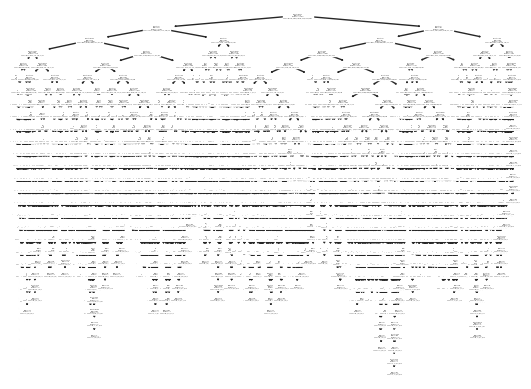

In [231]:
# tree.plot_tree(clf)

# Нейронки

In [49]:
data_clear

,order_id,creation_date,session_date,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,...,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres
0,2441412,2020-03-07,1,Маленькие женщины,135,12,2.0,"ряд 5, место 6, ряд 5, место 5",63.291139,31.645570,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,2169133,2020-02-03,0,Маленькие женщины,135,12,4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...",189.873418,47.468354,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,2187694,2020-02-06,0,Маленькие женщины,135,12,2.0,"ряд 8, место 8, ряд 8, место 9",47.468354,23.734177,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,2182225,2020-02-05,0,Маленькие женщины,135,12,2.0,"ряд 8, место 6, ряд 8, место 5",47.468354,23.734177,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,2209967,2020-02-08,0,Маленькие женщины,135,12,3.0,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11",132.911392,44.303797,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512567,2523437,2020-08-03,0,Крестон,73,18,2.0,"ряд 7, место 15, ряд 7, место 14",142.405063,71.202532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512568,2661648,2020-10-03,1,N.I.C.E. Мы будем юными и прекрасными,92,16,2.0,"ряд 10, место 11, ряд 10, место 12",110.759494,55.379747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512569,2537917,2020-08-22,1,«ДОКер 2020»: Роболав,76,16,1.0,"ряд 7, место 14",63.291139,63.291139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512570,2530078,2020-08-12,1,«ДОКер 2020»: Роболав,76,16,2.0,"ряд 12, место 1, ряд 12, место 2",126.582278,63.291139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [382]:
data_ai=filtred_data_clear.drop(columns = ['order_id', 'creation_date', 'session_date', 'movie_name', 'number_of_tickets', 'places', 'sales_in_cu','cinema_name','cinema_address', 'cinema_latitude', 'cinema_longitude', 'cinema_city','client_id', 'movie_rating'], axis=1)
data_ai

,movie_duration,movie_age_restriction,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres
0,135,12,31.645570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,135,12,47.468354,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,135,12,23.734177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,135,12,23.734177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,135,12,44.303797,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512567,73,18,71.202532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512568,92,16,55.379747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512569,76,16,63.291139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512570,76,16,63.291139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [383]:
y_ai=filtred_data_clear['sales_in_cu']
y_ai

0          63.291139
1         189.873418
2          47.468354
3          47.468354
4         132.911392
             ...    
512567    142.405063
512568    110.759494
512569     63.291139
512570    126.582278
512571    110.759494
Name: sales_in_cu, Length: 511385, dtype: float64

In [384]:
X_train, X_test, y_train, y_test = train_test_split(data_ai, y_ai, test_size = 0.20)

In [385]:
ANN_regressor = MLPRegressor(hidden_layer_sizes=(3, 3, 3, 3), max_iter = 5000, activation = 'tanh', solver='adam', alpha = 0.0001, random_state = 0)
ANN_regressor.fit(X_train, y_train)
Pred_A = ANN_regressor.predict(X_train)
Pred_A #ok работает

array([105.93469202,  86.56545215,  44.43917894, ...,  97.21685069,
        41.78830258,  87.40728259])

In [386]:
pred_B = ANN_regressor.predict(X_test)
pred_B

array([152.54121   , 186.63791899, 130.91100426, ...,  41.79102801,
        94.29246519,  87.58876264])

In [387]:
y_test=y_test.reset_index(drop=True)
y_test
aaa=np.array(y_test)
y_testsp=[]
for i in range(len(aaa)):
    y_testsp.append(i)
data.columns

Index(['order_id', 'creation_date', 'session_date', 'movie_name',
       'movie_duration', 'movie_age_restriction', 'genre_is_triller',
       'genre_is_military', 'genre_is_action', 'genre_is_biographical',
       'genre_is_fairy_tale', 'genre_is_science', 'genre_is_fantasy',
       'genre_is_historical', 'genre_is_drama', 'genre_is_animation',
       'genre_is_cartoon', 'genre_is_documentary', 'genre_is_adventure',
       'genre_is_fiction', 'genre_is_childish', 'genre_is_horror',
       'genre_is_humor', 'genre_is_western', 'genre_is_noir',
       'genre_is_detective', 'genre_is_biography', 'genre_is_criminal',
       'genre_is_tragicomedy', 'genre_is_biopic', 'genre_is_mystic',
       'genre_is_family', 'genre_is_comedy', 'genre_is_arthouse',
       'number_of_tickets', 'places', 'sales_in_cu', 'ticket_price_in_cu',
       'cinema_name', 'cinema_address', 'cinema_latitude', 'cinema_longitude',
       'cinema_city', 'client_id'],
      dtype='object')

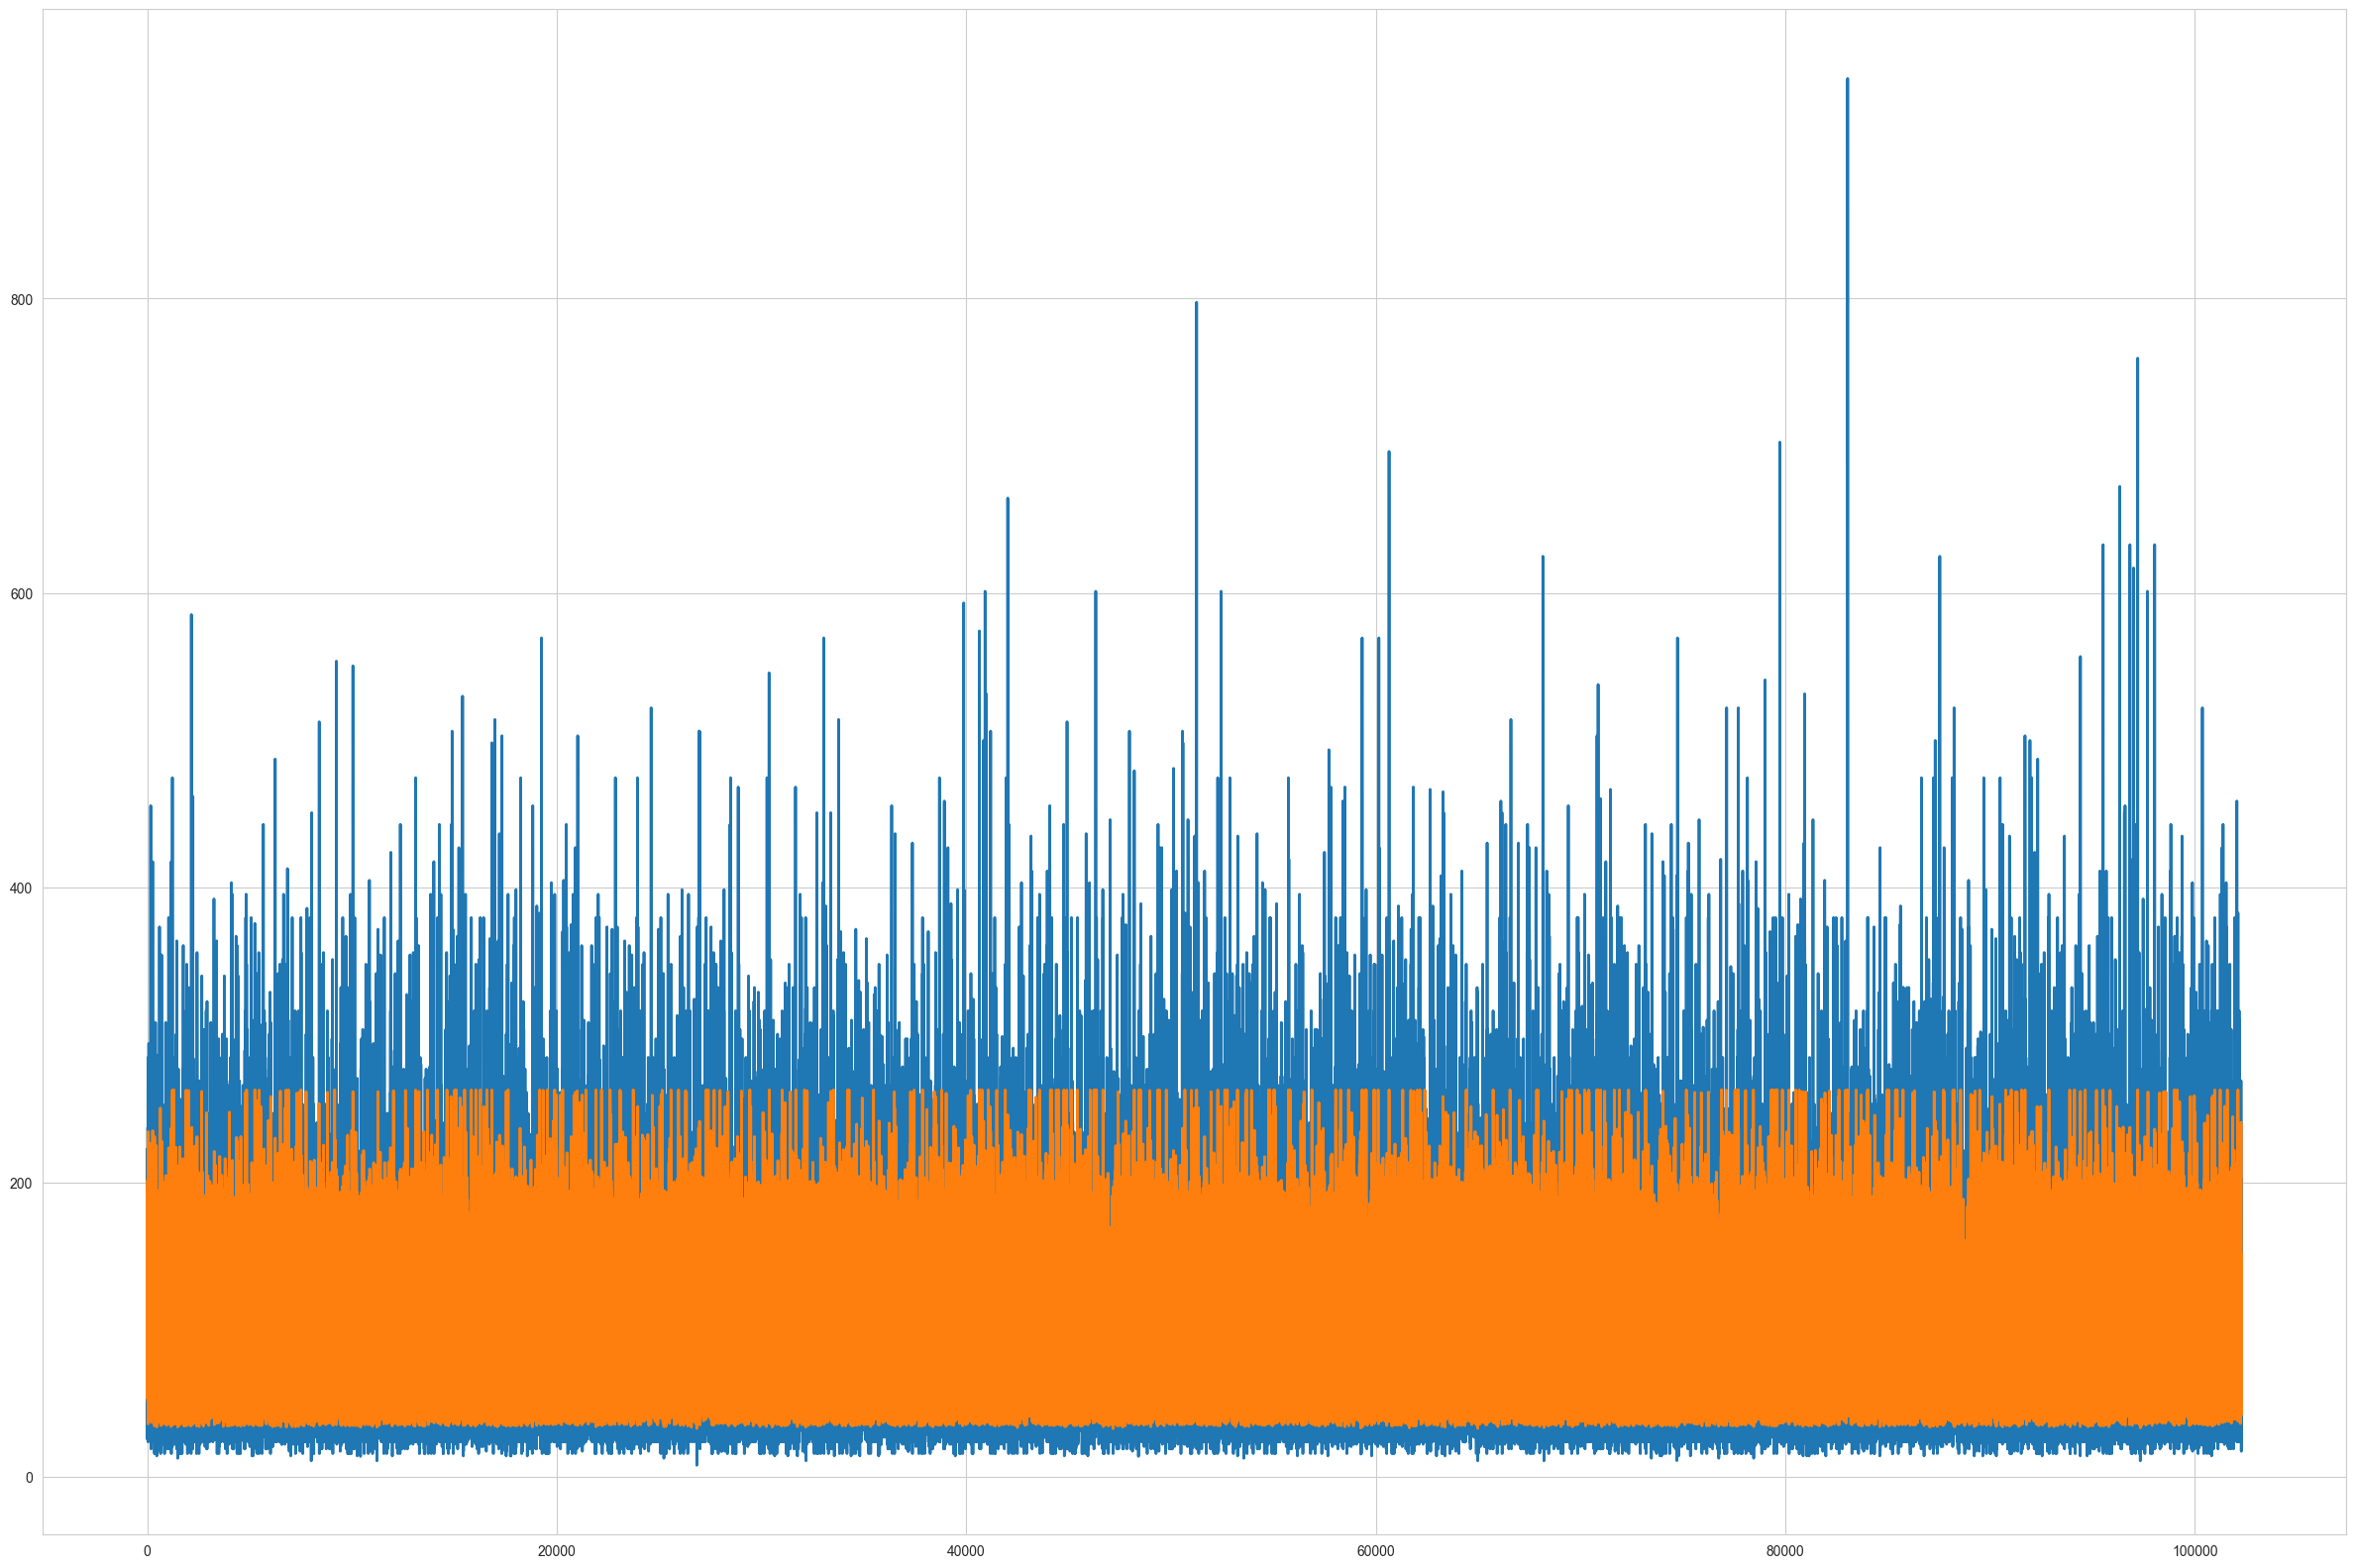

In [388]:
df_ai=pd.DataFrame()
plt.figure(figsize=(30, 20))
plt.plot(aaa, linewidth=2)
plt.plot(pred_B, linewidth=2)
plt.show()